In [530]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency 
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.ensemble import AdaBoostClassifier
import time

In [531]:
df = pd.read_csv("HR-Employee-Attrition.csv")

In [532]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [533]:
df = pd.concat([df.drop('Attrition', axis=1), df['Attrition']], axis=1)

In [534]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [535]:
df['Attrition'] = df['Attrition'].map({'Yes': 0, 'No':1})

In [536]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.838776
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,1.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,1.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,1.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


## Missing Data

In [537]:
sum(df.isnull().sum())

0

## Duplicates

In [538]:
sum(df.duplicated())

0

In [539]:
df.shape

(1470, 35)

## Data - Balanced or Not

In [540]:
df['Attrition'].value_counts()

1    1233
0     237
Name: Attrition, dtype: int64

Interpretation:
IBM's attrition rate is (237/1470) = 16.12%
As we can see, we have imbalanced dataset and there is no issue with it. It's practical and make sense to have low attrition rate as possible.

Diving dataset based on numerical and categorical datatype

In [541]:
num_f = df.select_dtypes(include=[np.number])
cat_f = df.select_dtypes(exclude=[np.number])

Renaming all columns based on dtype:

In [542]:
#Renaming Numeric columns with suffic '_N'
num_col = dict(zip(num_f.columns,num_f.columns+'_N'))

#Renaming Categorical columns with suffice 
cat_col = dict(zip(cat_f.columns,cat_f.columns+'_C'))

In [543]:
del num_f, cat_f

In [544]:
#Combining both dictionary
num_col.update(cat_col)

In [545]:
df.rename(columns=num_col, inplace=True)

In [546]:
del num_col, cat_col

In [547]:
df.rename(columns={'Attrition_N':'Attrition_N_C'}, inplace=True)

#### Numerical Data

In [548]:
num_df = df.filter(like='_N', axis=1)

In [549]:
num_df.head()

,Age_N,DailyRate_N,DistanceFromHome_N,Education_N,EmployeeCount_N,EmployeeNumber_N,EnvironmentSatisfaction_N,HourlyRate_N,JobInvolvement_N,JobLevel_N,...,StandardHours_N,StockOptionLevel_N,TotalWorkingYears_N,TrainingTimesLastYear_N,WorkLifeBalance_N,YearsAtCompany_N,YearsInCurrentRole_N,YearsSinceLastPromotion_N,YearsWithCurrManager_N,Attrition_N_C
0,41,1102,1,2,1,1,2,94,3,2,...,80,0,8,0,1,6,4,0,5,0
1,49,279,8,1,1,2,3,61,2,2,...,80,1,10,3,3,10,7,1,7,1
2,37,1373,2,2,1,4,4,92,2,1,...,80,0,7,3,3,0,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,80,0,8,3,3,8,7,3,0,1
4,27,591,2,1,1,7,1,40,3,1,...,80,1,6,3,3,2,2,2,2,1


In [550]:
num_df.nunique().sort_values()

EmployeeCount_N                  1
StandardHours_N                  1
Attrition_N_C                    2
PerformanceRating_N              2
WorkLifeBalance_N                4
StockOptionLevel_N               4
EnvironmentSatisfaction_N        4
JobInvolvement_N                 4
JobSatisfaction_N                4
RelationshipSatisfaction_N       4
Education_N                      5
JobLevel_N                       5
TrainingTimesLastYear_N          7
NumCompaniesWorked_N            10
PercentSalaryHike_N             15
YearsSinceLastPromotion_N       16
YearsWithCurrManager_N          18
YearsInCurrentRole_N            19
DistanceFromHome_N              29
YearsAtCompany_N                37
TotalWorkingYears_N             40
Age_N                           43
HourlyRate_N                    71
DailyRate_N                    886
MonthlyIncome_N               1349
MonthlyRate_N                 1427
EmployeeNumber_N              1470
dtype: int64

#### Checking Categorical Variables

In [551]:
cat_df = df.filter(like='_C', axis=1)

In [552]:
cat_df.head()

,BusinessTravel_C,Department_C,EducationField_C,Gender_C,JobRole_C,MaritalStatus_C,Over18_C,OverTime_C,Attrition_N_C
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,0
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,1
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,0
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,1
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,1


In [553]:
cat_df.nunique().sort_values()

Over18_C            1
Gender_C            2
OverTime_C          2
Attrition_N_C       2
BusinessTravel_C    3
Department_C        3
MaritalStatus_C     3
EducationField_C    6
JobRole_C           9
dtype: int64

#### Removing features with redundant values
* EmployeeCount
<br>
* StandardHour
<br>
* Over18

In [554]:
num_df.drop(['EmployeeCount_N','StandardHours_N'], axis=1, inplace=True)
cat_df.drop('Over18_C', axis=1, inplace=True)
df.drop(['EmployeeCount_N','StandardHours_N', 'Over18_C'], axis=1, inplace=True)

In [555]:
cat_df.nunique().sort_values()

Gender_C            2
OverTime_C          2
Attrition_N_C       2
BusinessTravel_C    3
Department_C        3
MaritalStatus_C     3
EducationField_C    6
JobRole_C           9
dtype: int64

### Exploratory Data Analysis

#### Numerical Features

In [556]:
num_df.shape

(1470, 25)

In [557]:
num_df.head()

,Age_N,DailyRate_N,DistanceFromHome_N,Education_N,EmployeeNumber_N,EnvironmentSatisfaction_N,HourlyRate_N,JobInvolvement_N,JobLevel_N,JobSatisfaction_N,...,RelationshipSatisfaction_N,StockOptionLevel_N,TotalWorkingYears_N,TrainingTimesLastYear_N,WorkLifeBalance_N,YearsAtCompany_N,YearsInCurrentRole_N,YearsSinceLastPromotion_N,YearsWithCurrManager_N,Attrition_N_C
0,41,1102,1,2,1,2,94,3,2,4,...,1,0,8,0,1,6,4,0,5,0
1,49,279,8,1,2,3,61,2,2,2,...,4,1,10,3,3,10,7,1,7,1
2,37,1373,2,2,4,4,92,2,1,3,...,2,0,7,3,3,0,0,0,0,0
3,33,1392,3,4,5,4,56,3,1,3,...,3,0,8,3,3,8,7,3,0,1
4,27,591,2,1,7,1,40,3,1,2,...,4,1,6,3,3,2,2,2,2,1


In [558]:
num_df.nunique().sort_values()

Attrition_N_C                    2
PerformanceRating_N              2
WorkLifeBalance_N                4
StockOptionLevel_N               4
EnvironmentSatisfaction_N        4
RelationshipSatisfaction_N       4
JobInvolvement_N                 4
JobSatisfaction_N                4
Education_N                      5
JobLevel_N                       5
TrainingTimesLastYear_N          7
NumCompaniesWorked_N            10
PercentSalaryHike_N             15
YearsSinceLastPromotion_N       16
YearsWithCurrManager_N          18
YearsInCurrentRole_N            19
DistanceFromHome_N              29
YearsAtCompany_N                37
TotalWorkingYears_N             40
Age_N                           43
HourlyRate_N                    71
DailyRate_N                    886
MonthlyIncome_N               1349
MonthlyRate_N                 1427
EmployeeNumber_N              1470
dtype: int64

In [559]:
num_df['PerformanceRating_N'].value_counts()

3    1244
4     226
Name: PerformanceRating_N, dtype: int64

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [560]:
temp = num_df.groupby(['WorkLifeBalance_N', 'Attrition_N_C'])['EmployeeNumber_N'].count().reset_index()
temp

,WorkLifeBalance_N,Attrition_N_C,EmployeeNumber_N
0,1,0,25
1,1,1,55
2,2,0,58
3,2,1,286
4,3,0,127
5,3,1,766
6,4,0,27
7,4,1,126


([<matplotlib.axis.XTick at 0x1304fd978>,
 <a list of 4 Text xticklabel objects>)

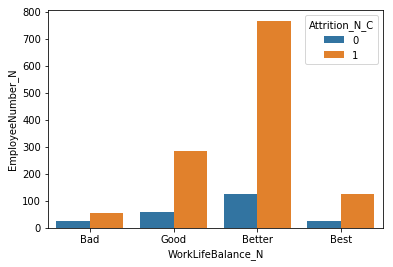

In [561]:
sns.barplot('WorkLifeBalance_N', 'EmployeeNumber_N', data=temp, hue='Attrition_N_C')
plt.xticks([0,1,2,3],['Bad' ,'Good' ,'Better' ,'Best'])

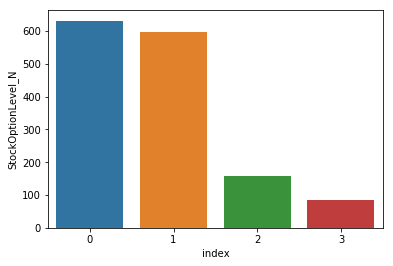

In [562]:
temp = num_df['StockOptionLevel_N'].value_counts().reset_index()
sns.barplot('index','StockOptionLevel_N', data=temp);

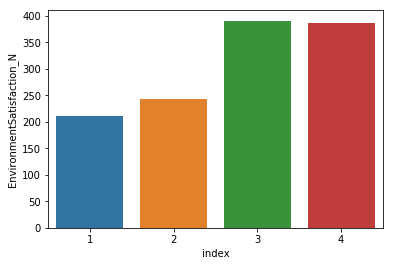

In [563]:
temp = num_df[num_df['Attrition_N_C']==1]['EnvironmentSatisfaction_N'].value_counts().reset_index()
sns.barplot('index','EnvironmentSatisfaction_N', data=temp);

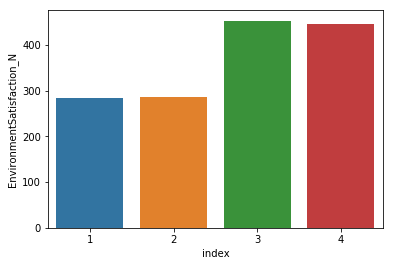

In [564]:
temp = num_df['EnvironmentSatisfaction_N'].value_counts().reset_index()
sns.barplot('index','EnvironmentSatisfaction_N', data=temp);

Distribution:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


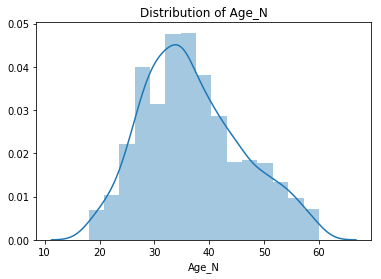

Skewness: 0.4132863018563338
Kurtosis: -0.4041451371872906


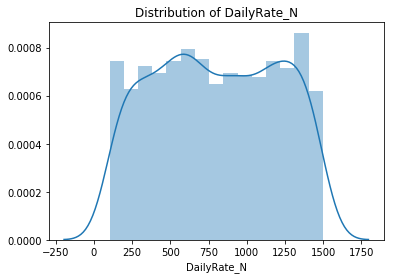

Skewness: -0.003518568352325854
Kurtosis: -1.2038228076234574


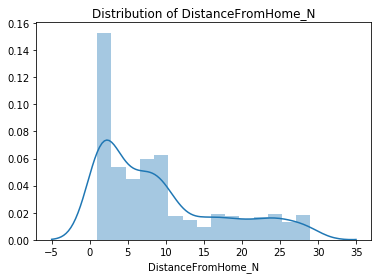

Skewness: 0.9581179956568269
Kurtosis: -0.22483340490405102


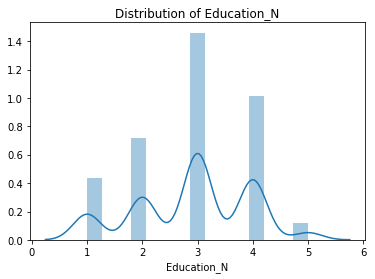

Skewness: -0.2896810819684331
Kurtosis: -0.5591149664143074


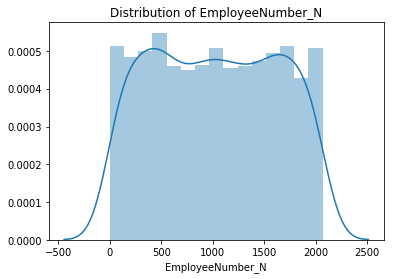

Skewness: 0.016574019580105036
Kurtosis: -1.2231789059146994


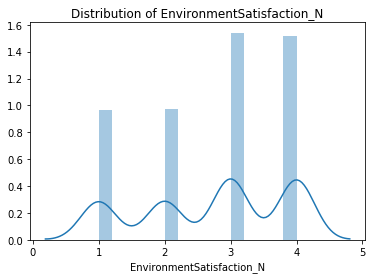

Skewness: -0.32165444773937907
Kurtosis: -1.2025205217966843


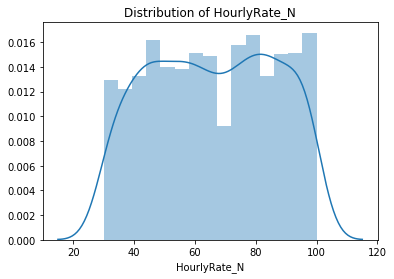

Skewness: -0.03231095290044942
Kurtosis: -1.1963984562565886


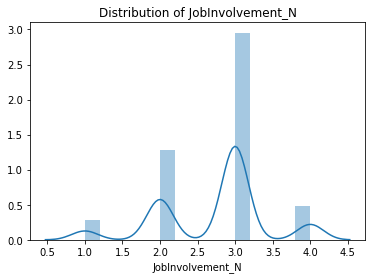

Skewness: -0.4984193640419493
Kurtosis: 0.27099876649436405


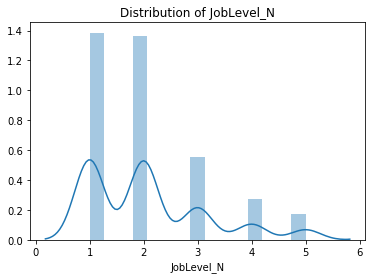

Skewness: 1.0254012829518246
Kurtosis: 0.39915205539119025


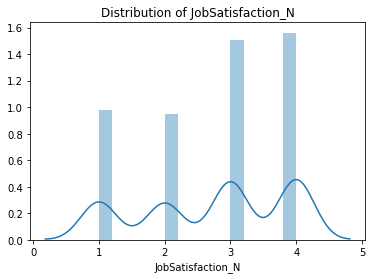

Skewness: -0.3296719586636647
Kurtosis: -1.2221925684964252


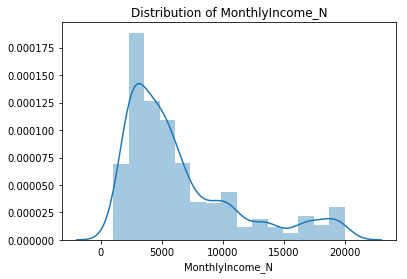

Skewness: 1.3698166808390662
Kurtosis: 1.005232691449859


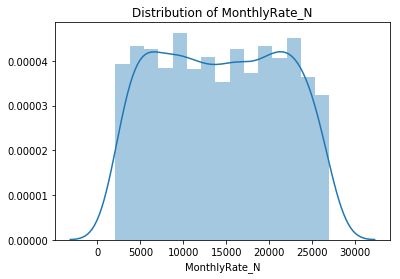

Skewness: 0.018577807891132458
Kurtosis: -1.2149560995878737


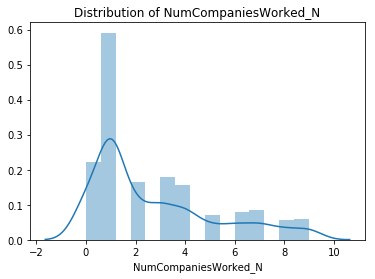

Skewness: 1.026471111968205
Kurtosis: 0.01021381669037602


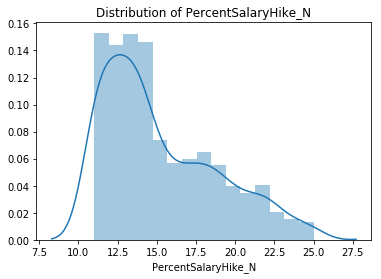

Skewness: 0.8211279755780908
Kurtosis: -0.30059822209054543


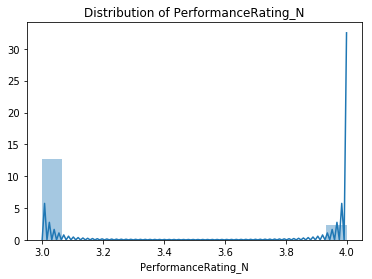

Skewness: 1.921882702142603
Kurtosis: 1.6959386701408348


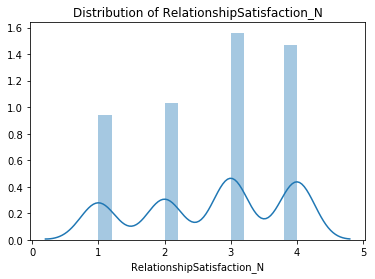

Skewness: -0.30282756517072296
Kurtosis: -1.184813981868854


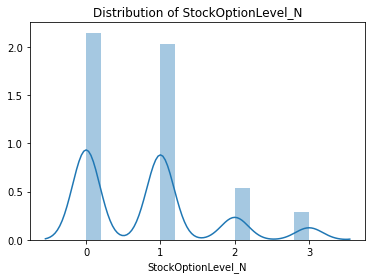

Skewness: 0.9689803167738937
Kurtosis: 0.3646343338026954


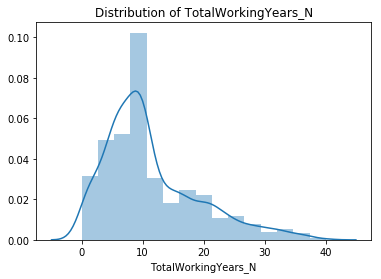

Skewness: 1.1171718528128527
Kurtosis: 0.918269536621358


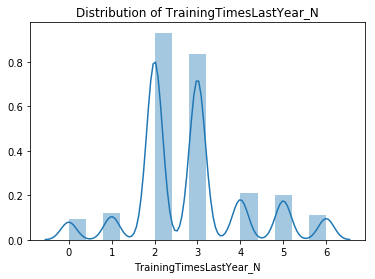

Skewness: 0.5531241710537028
Kurtosis: 0.4949929860394717


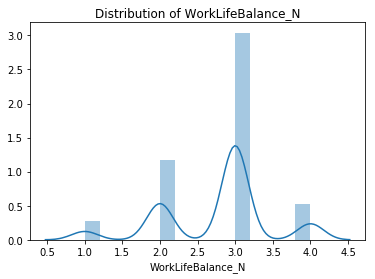

Skewness: -0.5524802990965146
Kurtosis: 0.4194604953216339


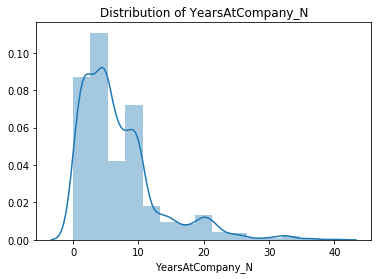

Skewness: 1.7645294543422085
Kurtosis: 3.93550875575465


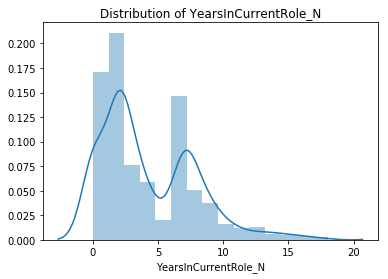

Skewness: 0.9173631562908262
Kurtosis: 0.47742077351356293


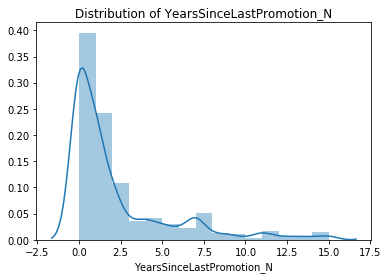

Skewness: 1.9842899833524859
Kurtosis: 3.612673114548667


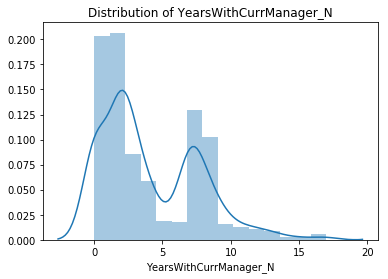

Skewness: 0.8334509919918475
Kurtosis: 0.17105808388335575


In [565]:
def distribution(df, feature):
    plt.figure()
    sns.distplot(df[feature], bins=15)
    plt.title('Distribution of {}'.format(feature))
    plt.show()
    print("Skewness: {}\nKurtosis: {}".format(df[feature].skew(), df[feature].kurtosis()))    

for i in num_df.iloc[:,:-1].columns:
    distribution(num_df,i)

Let's explore features with uniform distribution:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


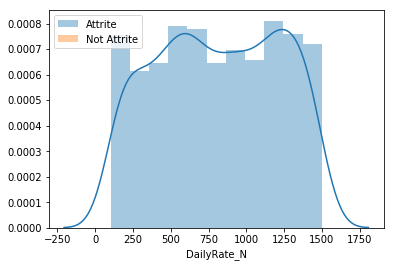

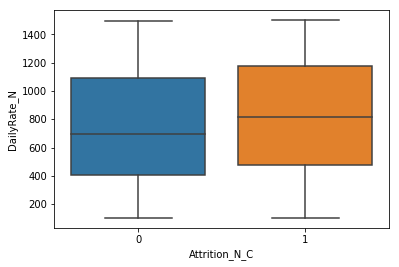

In [566]:
sns.distplot(num_df.loc[num_df['Attrition_N_C']==1, 'DailyRate_N'], label='Attrite')
sns.distplot(num_df.loc[num_df['Attrition_N_C']==2, 'DailyRate_N'], label='Not Attrite')
plt.legend()
plt.figure()
sns.boxplot('Attrition_N_C', 'DailyRate_N', data=num_df)

Distribution is somewhat same for attrition labels. So, it means it doesn't have any effect on it. Let's drop it.

In [567]:
num_df.drop('DailyRate_N', axis=1, inplace=True)
df.drop('DailyRate_N', axis=1, inplace=True)

Hourly Rate

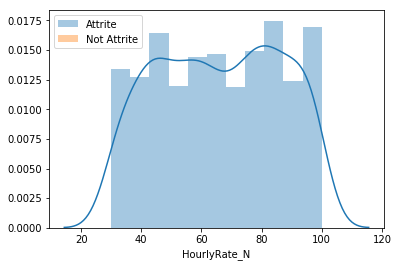

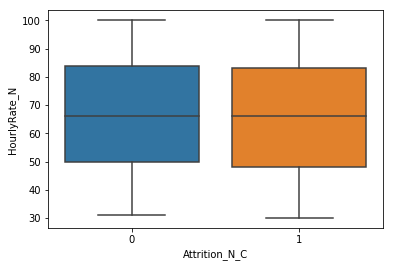

In [568]:
sns.distplot(num_df.loc[num_df['Attrition_N_C']==1, 'HourlyRate_N'], label='Attrite')
sns.distplot(num_df.loc[num_df['Attrition_N_C']==2, 'HourlyRate_N'], label='Not Attrite')
plt.legend()
plt.figure()
sns.boxplot('Attrition_N_C', 'HourlyRate_N', data=num_df)

Distribution is somewhat same for attrition labels. So, it means it doesn't have any effect on it. Let's drop it.

In [569]:
num_df.drop('HourlyRate_N', axis=1, inplace=True)
df.drop('HourlyRate_N', axis=1, inplace=True)

Monthly Rate

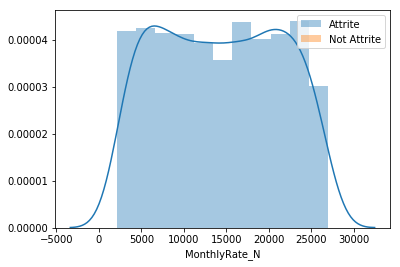

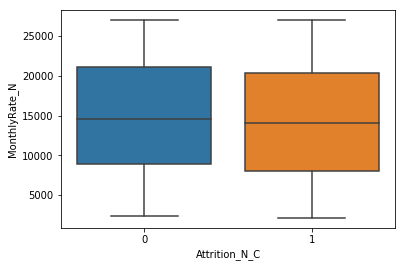

In [570]:
sns.distplot(num_df.loc[num_df['Attrition_N_C']==1, 'MonthlyRate_N'], label='Attrite')
sns.distplot(num_df.loc[num_df['Attrition_N_C']==2, 'MonthlyRate_N'], label='Not Attrite')
plt.legend()
plt.figure()
sns.boxplot('Attrition_N_C', 'MonthlyRate_N', data=num_df)

Distribution is somewhat same for attrition labels. So, it means it doesn't have any effect on it. Let's drop it.

In [571]:
num_df.drop('MonthlyRate_N', axis=1, inplace=True)
df.drop('MonthlyRate_N', axis=1, inplace=True)

Correlation Matrix

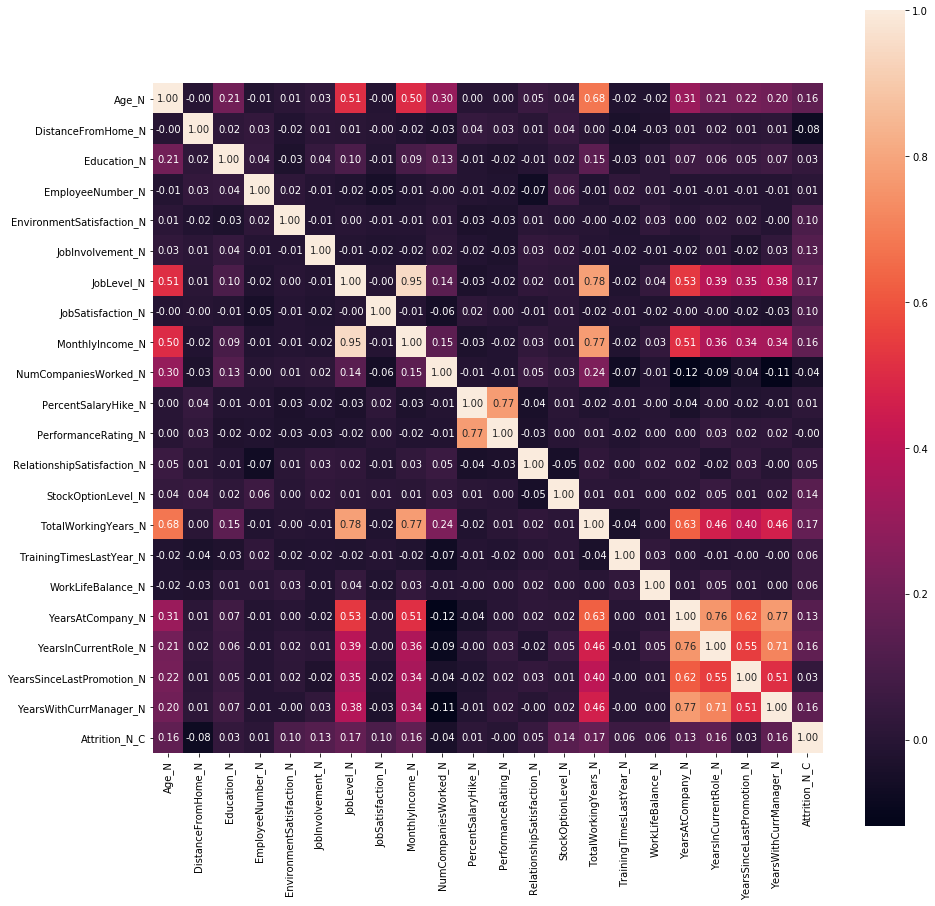

In [572]:
plt.figure(figsize=(15,15))
sns.heatmap(num_df.corr(), annot=True, fmt='.2f', square=True )
plt.show()

#### Following pairs have correlation >0.6:

In [573]:
correlation_matrix = num_df.corr().unstack().reset_index()
correlation_matrix[(correlation_matrix['level_0']!=correlation_matrix['level_1']) & (correlation_matrix[0]>0.6)].sort_values(by=0, ascending=False)

,level_0,level_1,0
182,MonthlyIncome_N,JobLevel_N,0.950300
140,JobLevel_N,MonthlyIncome_N,0.950300
146,JobLevel_N,TotalWorkingYears_N,0.782208
314,TotalWorkingYears_N,JobLevel_N,0.782208
231,PercentSalaryHike_N,PerformanceRating_N,0.773550
252,PerformanceRating_N,PercentSalaryHike_N,0.773550
190,MonthlyIncome_N,TotalWorkingYears_N,0.772893
316,TotalWorkingYears_N,MonthlyIncome_N,0.772893
394,YearsAtCompany_N,YearsWithCurrManager_N,0.769212
457,YearsWithCurrManager_N,YearsAtCompany_N,0.769212


Let's go through each combination one by one:

Top 3 correlation combination:
1. JobLevel, MonthlyIncome (0.95)
2. JobLevel, Total Working Years (0.78)
3. MonthlyIncome, Total Working Years (0.77)

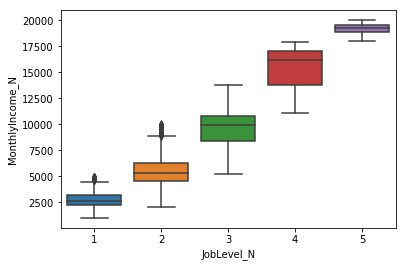

In [574]:
sns.boxplot('JobLevel_N', 'MonthlyIncome_N', data=num_df)

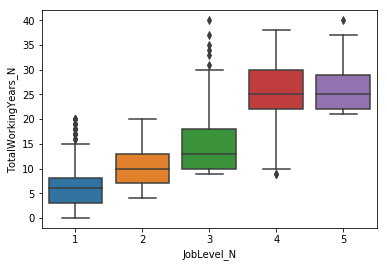

In [575]:
sns.boxplot('JobLevel_N', 'TotalWorkingYears_N', data=num_df)

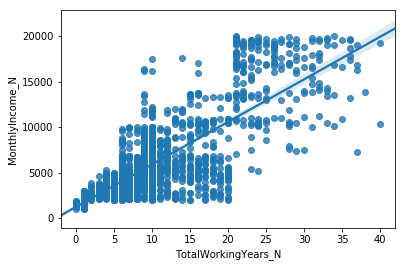

In [576]:
sns.regplot( 'TotalWorkingYears_N', 'MonthlyIncome_N',data=num_df )

In [577]:
num_df.drop('JobLevel_N', axis=1, inplace=True)
df.drop('JobLevel_N', axis=1, inplace=True)

Age and Working Year

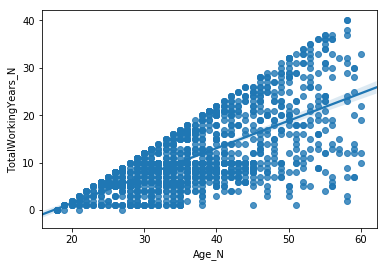

In [578]:
# Age_N	TotalWorkingYears_N
sns.regplot('Age_N', 'TotalWorkingYears_N', data=num_df)

In [579]:
#Droping the totalworkingyears
num_df.drop('Age_N', axis=1, inplace=True)
df.drop('Age_N', axis=1, inplace=True)

TrainingTimeLast YEar

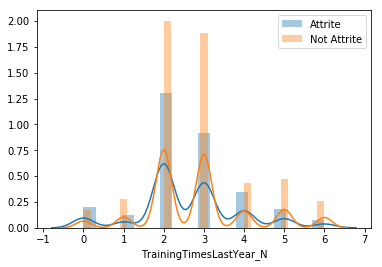

In [580]:
sns.distplot(num_df.loc[num_df['Attrition_N_C']==0,'TrainingTimesLastYear_N'], label='Attrite' )
sns.distplot(num_df.loc[num_df['Attrition_N_C']==1,'TrainingTimesLastYear_N'], label='Not Attrite' )
plt.legend()
plt.show()

In [581]:
pd.crosstab(num_df['Attrition_N_C'], num_df['TrainingTimesLastYear_N'] )

TrainingTimesLastYear_N,0,1,2,3,4,5,6
Attrition_N_C,,,,,,,
0,15,9,98,69,26,14,6
1,39,62,449,422,97,105,59


In [609]:
num_df['TrainingTimesLastYear_N'].head()

0    0
1    3
2    3
3    3
4    3
Name: TrainingTimesLastYear_N, dtype: int64

Percent Salary Hike &	Performance Rating

In [583]:
num_df.groupby(['PercentSalaryHike_N', 'PerformanceRating_N'])['EmployeeNumber_N'].count().unstack()

PerformanceRating_N,3,4
PercentSalaryHike_N,,
11,210.0,NaN
12,198.0,NaN
13,209.0,NaN
14,201.0,NaN
15,101.0,NaN
16,78.0,NaN
17,82.0,NaN
18,89.0,NaN
19,76.0,NaN


Interpretation:
<br>
Using Salary hike and Performance Rating combinatio, we can estimate that people with performance rating '3' have salaryhike b/w 11 and 19 and for '4', it's b/w 20 and 25.
<br>
* We'll go with percent salary hike

In [584]:
num_df.drop('PerformanceRating_N', axis=1, inplace=True)
df.drop('PerformanceRating_N', axis=1, inplace=True)

### Categorical Data

In [585]:
cat_df.head()

,BusinessTravel_C,Department_C,EducationField_C,Gender_C,JobRole_C,MaritalStatus_C,OverTime_C,Attrition_N_C
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes,0
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,1
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,0
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes,1
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,1


In [586]:
cat_df.columns

Index(['BusinessTravel_C', 'Department_C', 'EducationField_C', 'Gender_C',
       'JobRole_C', 'MaritalStatus_C', 'OverTime_C', 'Attrition_N_C'],
      dtype='object')

#### ChiSquare Test for Independence

In [587]:
from itertools import combinations, permutations

In [588]:
def chisquare_test(table):
    stat, p, dof, expected = chi2_contingency(table)
    probability = 0.95
    critical = chi2.ppf(probability, dof)
    if abs(stat) >= critical:
        return True
    else:
        return False

categorical_stats = list()
i = 0
for x in combinations(cat_df,2):
    table = pd.crosstab(cat_df[x[0]], cat_df[x[1]])
    categorical_stats.extend([[x[0], x[1], chisquare_test(table)]])


In [589]:
categorical_stats = pd.DataFrame(categorical_stats, columns=['Col1', 'Col2', 'Dependent']).sort_values(by='Col1')

In [590]:
categorical_stats

,Col1,Col2,Dependent
0,BusinessTravel_C,Department_C,False
1,BusinessTravel_C,EducationField_C,False
2,BusinessTravel_C,Gender_C,False
3,BusinessTravel_C,JobRole_C,False
4,BusinessTravel_C,MaritalStatus_C,False
5,BusinessTravel_C,OverTime_C,False
6,BusinessTravel_C,Attrition_N_C,True
7,Department_C,EducationField_C,True
8,Department_C,Gender_C,False
9,Department_C,JobRole_C,True


#### Categorical Features
having correlation between them

In [591]:
categorical_stats[(categorical_stats.Col2 != 'Attrition_N_C') & (categorical_stats.Dependent== True )]

,Col1,Col2,Dependent
7,Department_C,EducationField_C,True
9,Department_C,JobRole_C,True
14,EducationField_C,JobRole_C,True
18,Gender_C,JobRole_C,True
22,JobRole_C,MaritalStatus_C,True


Interpretation:<br>
"JobRole_C" is in correlation with many other features. We can omit this.

In [592]:
pd.crosstab(cat_df['MaritalStatus_C'], cat_df['JobRole_C'])

JobRole_C,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
MaritalStatus_C,,,,,,,,,
Divorced,34,14,55,23,36,23,62,69,11
Married,61,28,116,56,67,38,122,151,34
Single,36,10,88,23,42,19,108,106,38


Interpretation:
MaritalStatus_C and JobRole_C has significant dependency but both can play significant role in determining attrition of an employee. So, we're keeping both features in our dataset

In [593]:
pd.crosstab(cat_df['EducationField_C'], cat_df['JobRole_C'])

JobRole_C,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
EducationField_C,,,,,,,,,
Human Resources,0,21,0,6,0,0,0,0,0
Life Sciences,60,13,119,40,71,36,133,107,27
Marketing,0,0,0,14,0,0,0,122,23
Medical,48,11,99,32,53,35,103,65,18
Other,9,3,22,5,7,4,17,13,2
Technical Degree,14,4,19,5,14,5,39,19,13


Interpretation:
Education is somewhat similar to JobRoles so we can omit EducationField.

In [594]:
pd.crosstab(cat_df['Department_C'], cat_df['JobRole_C'])

JobRole_C,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Department_C,,,,,,,,,
Human Resources,0,52,0,11,0,0,0,0,0
Research & Development,131,0,259,54,145,80,292,0,0
Sales,0,0,0,37,0,0,0,326,83


Interpretation:<br>
JobRole_C seems to a sub-department compared to department feature. We can omit "Department_C" feature as we can have all info we need from JobRole_C

In [595]:
categorical_stats[(categorical_stats.Col2 == 'Attrition_N_C') & (categorical_stats.Dependent== False )]

,Col1,Col2,Dependent
21,Gender_C,Attrition_N_C,False


Interpretation:<br>
We can remove the "Gender" from our analysis, as gender and attrition columns are independent. Being male or female, doesn't impact the attrition.

#### Dropping following features:
1. Gender_C
2. Department_C
3. EducationField_C

In [596]:
cat_df.drop(['Gender_C', 'Department_C', 'EducationField_C'], axis=1, inplace=True)
df.drop(['Gender_C', 'Department_C', 'EducationField_C'], axis=1, inplace=True)

### Featuring Engineering

In [597]:
cat_df.columns

Index(['BusinessTravel_C', 'JobRole_C', 'MaritalStatus_C', 'OverTime_C',
       'Attrition_N_C'],
      dtype='object')

OverTime Feature

In [598]:
pd.crosstab(cat_df.OverTime_C, cat_df.Attrition_N_C)

Attrition_N_C,0,1
OverTime_C,,
No,110,944
Yes,127,289


In [599]:
cat_df.OverTime_C = cat_df.OverTime_C.map({'Yes':1, 'No':0})


In [600]:
df.OverTime_C = df.OverTime_C.map({'Yes': 1, 'No':0})

Final Dataset

In [601]:
df.head()

,BusinessTravel_C,DistanceFromHome_N,Education_N,EmployeeNumber_N,EnvironmentSatisfaction_N,JobInvolvement_N,JobRole_C,JobSatisfaction_N,MaritalStatus_C,MonthlyIncome_N,...,RelationshipSatisfaction_N,StockOptionLevel_N,TotalWorkingYears_N,TrainingTimesLastYear_N,WorkLifeBalance_N,YearsAtCompany_N,YearsInCurrentRole_N,YearsSinceLastPromotion_N,YearsWithCurrManager_N,Attrition_N_C
0,Travel_Rarely,1,2,1,2,3,Sales Executive,4,Single,5993,...,1,0,8,0,1,6,4,0,5,0
1,Travel_Frequently,8,1,2,3,2,Research Scientist,2,Married,5130,...,4,1,10,3,3,10,7,1,7,1
2,Travel_Rarely,2,2,4,4,2,Laboratory Technician,3,Single,2090,...,2,0,7,3,3,0,0,0,0,0
3,Travel_Frequently,3,4,5,4,3,Research Scientist,3,Married,2909,...,3,0,8,3,3,8,7,3,0,1
4,Travel_Rarely,2,1,7,1,3,Laboratory Technician,2,Married,3468,...,4,1,6,3,3,2,2,2,2,1


### DATA MODEL

In [602]:
finaldf = pd.get_dummies(df)

In [603]:
finaldf.shape

(1470, 35)

In [604]:
target = finaldf.filter(like='Attrition', axis=1)

In [605]:
predictors = finaldf.drop('Attrition_N_C', axis=1)

In [606]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(predictors, target, test_size=0.3, random_state=42)

In [648]:
def execute_classifier(classifier_name, classifier, train_x, train_y, test_x, test_y):
    classifier.fit(train_x, train_y)

    train_score = classifier.score(train_x, train_y)
    test_score = classifier.score(test_x, test_y)

    print("\n--- {} ----\n".format(classifier_name.upper()))
    
    print('Train Score: {} \nTest Score: {}'.format(train_score, test_score))
    
    y_pred = classifier.predict(test_x)
    
    print('\nConfusion Matrix:\n', confusion_matrix(test_y, y_pred))
    
    print('\nClassification Report:\n', classification_report(test_y, y_pred))
    
    print('\n','-'*30,'\n')

    ###-------------- ADA BOOST --------------
    
    ada_boost = AdaBoostClassifier(base_estimator=classifier, n_estimators=50)
    ada_boost.fit(train_x, train_y)

    #Preditction Using Adaboost
    predictions = ada_boost.predict(test_x)

    #Calucating Accuracy
    calc_acc = accuracy_score(test_y, predictions)    
    print("\n--- ADA BOOST ----\n")
    print("Accuracy Score = ", calc_acc)

    calc_f1_score = f1_score(test_y,predictions)
    print ("\nF1 Score = ",calc_f1_score)
    print("\nConfusion Matrix:\n ",confusion_matrix(test_y,predictions))
    print ("\nClassification Report: \n",classification_report(test_y, predictions))
    fpr, tpr, thresholds = roc_curve(test_y, predictions)
    calc_auc = auc(fpr, tpr)
    print("\nAUC: ", calc_auc)
    


In [649]:
classifier = LogisticRegression(random_state=42 )
execute_classifier('Logistic Regression',classifier, Xtrain, Ytrain, Xtest, Ytest)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



--- LOGISTIC REGRESSION ----

Train Score: 0.892128279883382 
Test Score: 0.873015873015873

Confusion Matrix:
 [[ 20  41]
 [ 15 365]]

Classification Report:
              precision    recall  f1-score   support

          0       0.57      0.33      0.42        61
          1       0.90      0.96      0.93       380

avg / total       0.85      0.87      0.86       441


 ------------------------------ 


--- ADA BOOST ----

Accuracy Score =  0.8707482993197279

F1 Score =  0.9277566539923954

Confusion Matrix:
  [[ 18  43]
 [ 14 366]]

Classification Report: 
              precision    recall  f1-score   support

          0       0.56      0.30      0.39        61
          1       0.89      0.96      0.93       380

avg / total       0.85      0.87      0.85       441


AUC:  0.6291199309749784
